This notebook is meant to extract useful information from `nba_elo.csv` from the [538 Repo](https://github.com/fivethirtyeight/data/tree/master/nba-forecasts).

Specifically, the notebooks hopes to do the following for all ratings of team Elo, team RAPTOR, and team CarmELO:
* Get final {rating} of all teams for all seasons (at the end of regular season)
* Get initial {rating} of all teams for all seasons (at the beginning of regular season)
* Get average {rating} of all teams for all seasons (averaged through the regular season)


Ratings:
* RAPTOR only exists 2019-
* CarmELO only exists 2015-

Since only ELO exists for all seasons, only ELO will be considered.

Background of the ratings: https://fivethirtyeight.com/methodology/how-our-nba-predictions-work/


In [9]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("./raw/nba_elo.csv", parse_dates=['date'])

<AxesSubplot:>

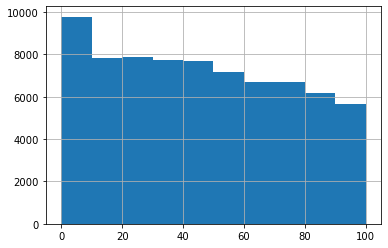

In [10]:
raw_df['quality'].hist()

In [11]:
raw_df.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [38]:
df = raw_df.drop(columns = [
    'elo_prob1', 'elo_prob2', 
    'carm-elo_prob1', 'carm-elo_prob2',
    'raptor_prob1', 'raptor_prob2',
    'quality', 'importance', 
    'total_rating', 'neutral'
])

df = df[['date','season', 'playoff', 'team1', 'team2',
         'elo1_pre', 'elo2_pre', 'elo1_post', 'elo2_post',
         'score1', 'score2']]

# drop 2023 season
df = df[df['season']!=2023]

In [15]:
df['playoff'].unique()

array([nan, 't', 'q', 's', 'c', 'f', 'p'], dtype=object)

**Playoff Meaning**
* `p` = play-in
* `q` = conference quarter-finals
* `s` = conference semi-finals
* `c` = conference finals
* `t` or `f` = finals

In [42]:
reg_df = df[df['playoff'].isna()].drop(columns = ['playoff', 'score1', 'score2'])
fin_df = df[df['playoff'].isin(['t', 'f'])].drop(columns = 'playoff')

In [43]:
fin_df

,date,season,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post,score1,score2
331,1947-04-02,1947,CLR,NYK,1289.148700,1332.156000,1304.940700,1316.364000,77.0,51.0
332,1947-04-02,1947,PHW,STB,1389.967300,1369.411400,1394.243800,1365.134900,73.0,68.0
333,1947-04-02,1947,WSC,CHS,1518.725300,1386.625600,1491.384300,1413.966700,65.0,81.0
334,1947-04-03,1947,WSC,CHS,1491.384300,1413.966700,1467.292400,1438.058600,53.0,69.0
335,1947-04-05,1947,NYK,CLR,1316.364000,1304.940700,1323.734400,1297.570300,86.0,74.0
...,...,...,...,...,...,...,...,...,...,...
72038,2022-06-05,2022,GSW,BOS,1657.437247,1763.576161,1673.603928,1747.409480,107.0,88.0
72039,2022-06-08,2022,BOS,GSW,1747.409480,1673.603928,1754.045814,1666.967594,116.0,100.0
72040,2022-06-10,2022,BOS,GSW,1754.045814,1666.967594,1735.839681,1685.173727,97.0,107.0
72041,2022-06-13,2022,GSW,BOS,1685.173727,1735.839681,1693.749069,1727.264339,104.0,94.0


In [32]:
reg_df

,date,season,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post
0,1946-11-01,1947,TRH,NYK,1300.000000,1300.000000,1293.276700,1306.723300
1,1946-11-02,1947,DTF,WSC,1300.000000,1300.000000,1279.618900,1320.381100
2,1946-11-02,1947,PRO,BOS,1300.000000,1300.000000,1305.154200,1294.845800
3,1946-11-02,1947,STB,PIT,1300.000000,1300.000000,1304.690800,1295.309200
4,1946-11-02,1947,CHS,NYK,1300.000000,1306.723300,1309.652100,1297.071200
...,...,...,...,...,...,...,...,...
71945,2022-04-10,2022,NOP,GSW,1535.608890,1590.183240,1515.735831,1610.056299
71946,2022-04-10,2022,PHO,SAC,1696.558277,1358.999780,1672.600919,1382.957138
71947,2022-04-10,2022,LAC,OKC,1530.122239,1327.421543,1537.785097,1319.758686
71948,2022-04-10,2022,POR,UTA,1261.370216,1580.747095,1252.969617,1589.147694


In [46]:
champs = fin_df.groupby(by = 'season').tail(1)

In [53]:
team1_wins

349       True
564       True
944       True
1537      True
1917      True
         ...  
67093    False
68405    False
69548    False
70719     True
72042    False
Length: 76, dtype: bool

In [55]:
champs[team1_wins] 

,date,season,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post,score1,score2,winner
349,1947-04-22,1947,PHW,CHS,1442.944800,1412.554700,1446.191900,1409.307600,83.0,80.0,CHS
564,1948-04-21,1948,BLB,PHW,1499.270800,1491.517900,1507.940300,1482.848400,88.0,73.0,PHW
944,1949-04-13,1949,MNL,WSC,1618.475700,1495.985500,1624.731700,1489.729500,77.0,56.0,WSC
1537,1950-04-23,1950,MNL,SYR,1721.031900,1602.756500,1726.111300,1597.677000,110.0,95.0,SYR
1917,1951-04-21,1951,ROC,NYK,1610.748000,1535.215200,1613.708300,1532.255000,79.0,75.0,NYK
2272,1952-04-25,1952,MNL,NYK,1639.726600,1600.736300,1647.899400,1592.563500,82.0,65.0,NYK
2993,1954-04-12,1954,MNL,SYR,1633.674400,1638.962200,1639.414200,1633.222400,87.0,80.0,SYR
3302,1955-04-10,1955,SYR,FTW,1620.445900,1562.722900,1622.509000,1560.659800,92.0,91.0,FTW
3613,1956-04-07,1956,PHW,FTW,1623.366200,1522.053600,1627.897200,1517.522600,99.0,88.0,FTW
3920,1957-04-13,1957,BOS,STL,1632.991100,1537.921100,1635.043100,1535.869100,125.0,123.0,STL


In [63]:
champs['winner'] = champs['team2']
team1_wins = champs['score1'] > champs['score2']
# https://datagy.io/pandas-conditional-column/
champs.loc[team1_wins, 'winner'] = champs['team1']

/tmp/local/65316193/ipykernel_15144/3528312025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champs['winner'] = champs['team2']


In [68]:
champs = champs[['season', 'winner']].reset_index(drop=True)

In [70]:
reg_df

,date,season,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post
0,1946-11-01,1947,TRH,NYK,1300.000000,1300.000000,1293.276700,1306.723300
1,1946-11-02,1947,DTF,WSC,1300.000000,1300.000000,1279.618900,1320.381100
2,1946-11-02,1947,PRO,BOS,1300.000000,1300.000000,1305.154200,1294.845800
3,1946-11-02,1947,STB,PIT,1300.000000,1300.000000,1304.690800,1295.309200
4,1946-11-02,1947,CHS,NYK,1300.000000,1306.723300,1309.652100,1297.071200
...,...,...,...,...,...,...,...,...
71945,2022-04-10,2022,NOP,GSW,1535.608890,1590.183240,1515.735831,1610.056299
71946,2022-04-10,2022,PHO,SAC,1696.558277,1358.999780,1672.600919,1382.957138
71947,2022-04-10,2022,LAC,OKC,1530.122239,1327.421543,1537.785097,1319.758686
71948,2022-04-10,2022,POR,UTA,1261.370216,1580.747095,1252.969617,1589.147694


In [71]:
df1 = reg_df[['date', 'season', 'team1', 'elo1_pre', 'elo1_post']]
df1.columns = ['date', 'season', 'team', 'elo_pre', 'elo_post']
df2 = reg_df[['date', 'season', 'team2', 'elo2_pre', 'elo2_post']]
df2.columns = ['date', 'season', 'team', 'elo_pre', 'elo_post']

In [75]:
full_df = pd.concat([df1, df2]).sort_values(by = 'date')

In [108]:
pre_Elo = (full_df.groupby(by = ['season', 'team'])
                 .head(1)[['season', 'team', 'elo_pre']]
                 .rename(columns = {'elo_pre':'Pre-Season'})
          )
post_Elo = (full_df.groupby(by = ['season', 'team'])
                 .tail(1)[['season', 'team', 'elo_post']]
                 .rename(columns = {'elo_post': 'Post-Reg_Season'})
            )

# All statistics will be based on the posts.
avg_Elo = (full_df.groupby(by = ['season', 'team'])
           .mean()
           .reset_index()[['season', 'team', 'elo_post']]
           .rename(columns = {'elo_post': 'Mean'})
          )
med_Elo = (full_df.groupby(by = ['season', 'team'])
           .median()
           .reset_index()[['season', 'team', 'elo_post']]
           .rename(columns = {'elo_post': 'Median'})
          )
min_Elo = (full_df.groupby(by = ['season', 'team'])
           .min()
           .reset_index()[['season', 'team', 'elo_post']]
           .rename(columns = {'elo_post': 'Min'})
          )
max_Elo = (full_df.groupby(by = ['season', 'team'])
           .median()
           .reset_index()[['season', 'team', 'elo_post']]
           .rename(columns = {'elo_post': 'Max'})
          )

In [112]:
final_df = (pre_Elo.merge(post_Elo, on = ['season', 'team'])
            .merge(avg_Elo, on = ['season', 'team'])
            .merge(med_Elo, on = ['season', 'team'])
            .merge(min_Elo, on = ['season', 'team'])
            .merge(max_Elo, on = ['season', 'team'])
            .merge(champs, on = ['season'])
)
final_df

,season,team,Pre-Season,Post-Reg_Season,Mean,Median,Min,Max,winner
0,1947,TRH,1300.000000,1208.313400,1242.179863,1236.873300,1200.070300,1236.873300,PHW
1,1947,NYK,1300.000000,1332.156000,1308.528252,1305.857150,1249.861200,1305.857150,PHW
2,1947,PRO,1300.000000,1276.740600,1279.100227,1275.776350,1250.736000,1275.776350,PHW
3,1947,STB,1300.000000,1369.411400,1344.680377,1348.777500,1302.598800,1348.777500,PHW
4,1947,CHS,1300.000000,1386.625600,1359.185192,1353.045800,1299.062600,1353.045800,PHW
...,...,...,...,...,...,...,...,...,...
1692,2022,WAS,1494.785854,1418.436496,1459.241778,1463.664629,1372.329766,1463.664629,GSW
1693,2022,ATL,1570.150094,1563.918805,1530.689816,1530.939576,1448.855121,1530.939576,GSW
1694,2022,LAC,1624.110628,1537.785097,1521.520605,1508.691391,1450.954385,1508.691391,GSW
1695,2022,DAL,1540.788162,1598.770266,1565.299401,1576.509342,1495.587067,1576.509342,GSW


In [113]:
final_df.to_csv('./modified/Elo_ratings_with_Champs.csv', index=False)